In [3]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import norm
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.optimize import minimize
from scipy.stats import norm

In [4]:

def generate_df(file_name):
    df = pd.read_csv(f"./data/coincodex2/{file_name}")
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date',inplace=True)
    df = df.iloc[::-1]
    df = df[df.index >= datetime(2020,12,1)]
    df.head()
    return df


In [5]:
eth_df = generate_df("ethereum_2020-12-1_2022-5-1.csv")
eth_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,616.183534,634.754677,573.516677,589.814467,2.780131e+10,6.856145e+10
2020-12-02,586.970964,602.820207,578.508054,598.357253,2.929685e+10,6.742433e+10
2020-12-03,598.537314,621.269532,588.649832,616.904853,1.884975e+10,6.886717e+10
2020-12-04,616.551824,618.836053,569.723831,571.978333,1.857875e+10,6.789766e+10
2020-12-05,568.823975,596.047597,563.491212,595.548506,1.865798e+10,6.679529e+10


In [6]:
sol_df = generate_df("solana_2020-12-1_2022-5-1.csv")
sol_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,1.962367,2.124009,1.932501,1.977516,3.660476e+07,9.317730e+07
2020-12-02,1.971593,2.172160,1.958971,2.112355,4.113504e+07,9.605753e+07
2020-12-03,2.114955,2.215764,2.080785,2.098405,5.240107e+07,9.900875e+07
2020-12-04,2.098405,2.110675,1.841711,1.856668,3.959888e+07,9.232912e+07
2020-12-05,1.851515,1.977514,1.827409,1.977440,3.075995e+07,8.849150e+07


In [7]:
avax_df = generate_df("avalanche_2020-12-1_2022-5-1.csv")
avax_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,3.704887,3.816191,3.511738,3.576271,3.049215e+07,8.937501e+07
2020-12-02,3.561117,3.844096,3.529078,3.745825,3.153232e+07,9.129669e+07
2020-12-03,3.738596,3.889555,3.723324,3.819472,2.743838e+07,9.302110e+07
2020-12-04,3.820087,3.865357,3.516727,3.556966,2.436822e+07,9.053740e+07
2020-12-05,3.534045,3.718005,3.513630,3.630332,2.445545e+07,8.940219e+07
...,...,...,...,...,...,...
2022-04-27,68.687900,71.788300,68.635758,69.829573,9.310510e+08,1.875723e+10
2022-04-28,69.860800,70.670900,66.689783,67.262100,8.171841e+08,1.851860e+10
2022-04-29,67.276200,67.915120,62.464900,63.307263,8.988281e+08,1.765212e+10


In [8]:
luna_df = generate_df("terra_2020-12-1_2022-5-1.csv")
luna_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,0.398038,0.422987,0.385526,0.388320,1.818310e+07,1.903319e+08
2020-12-02,0.388320,0.406310,0.383719,0.406310,1.461080e+07,1.865568e+08
2020-12-03,0.406310,0.506414,0.406310,0.506414,2.527123e+07,2.127522e+08
2020-12-04,0.506414,0.506414,0.451015,0.451015,5.824648e+07,2.267486e+08
2020-12-05,0.451015,0.509040,0.447550,0.509040,3.281306e+07,2.280636e+08
...,...,...,...,...,...,...
2022-04-27,88.430000,90.527900,87.623655,89.065569,3.903271e+09,3.079198e+10
2022-04-28,89.039400,92.250300,87.450600,88.665600,2.741257e+09,3.100122e+10
2022-04-29,89.093400,89.555713,84.254400,84.902554,3.124457e+09,2.986886e+10


In [9]:
near_df = generate_df("near-protocol_2020-12-1_2022-5-1.csv")
near_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,1.074047,1.136187,1.006713,1.075536,6.359005e+07,2.129790e+08
2020-12-02,1.061392,1.200548,1.045444,1.176352,9.519486e+07,2.282041e+08
2020-12-03,1.178527,1.193433,1.137444,1.155287,3.854613e+07,2.285274e+08
2020-12-04,1.155418,1.221788,1.097605,1.106827,3.739559e+07,2.284427e+08
2020-12-05,1.103230,1.142237,1.023442,1.111261,5.681561e+07,2.111705e+08
...,...,...,...,...,...,...
2022-04-27,12.679900,13.236634,12.458217,12.821237,2.126101e+09,8.757228e+09
2022-04-28,12.865400,13.109000,12.279441,12.390900,1.587002e+09,8.640117e+09
2022-04-29,12.403400,12.523900,11.140600,11.238076,1.430643e+09,8.018380e+09


In [10]:
ftm_df = generate_df("fantom_2020-12-1_2022-5-1.csv")
ftm_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,0.021029,0.023130,0.020284,0.020539,1.651956e+07,5.498381e+07
2020-12-02,0.020468,0.022986,0.020120,0.022646,1.459215e+07,5.454534e+07
2020-12-03,0.022651,0.024370,0.022395,0.022888,1.778216e+07,5.895707e+07
2020-12-04,0.022891,0.023116,0.020812,0.021042,1.551331e+07,5.587561e+07
2020-12-05,0.020936,0.022591,0.020684,0.022497,1.163651e+07,5.536606e+07
...,...,...,...,...,...,...
2022-04-27,0.969813,1.014150,0.966714,0.986282,8.016211e+08,2.517672e+09
2022-04-28,0.987763,1.015181,0.966272,0.968966,6.021604e+08,2.512392e+09
2022-04-29,0.970380,0.978572,0.814348,0.832615,6.847930e+08,2.331907e+09


In [11]:
portfolio_df = pd.concat([eth_df['Open'],sol_df['Open'],avax_df['Open'],luna_df['Open'],near_df['Open'],ftm_df['Open']],axis=1)
portfolio_df.columns = ['ETH','SOL','AVAX','LUNA','NEAR','FTM']
portfolio_df.head()

,ETH,SOL,AVAX,LUNA,NEAR,FTM
Date,,,,,,
2020-12-01,616.183534,1.962367,3.704887,0.398038,1.074047,0.021029
2020-12-02,586.970964,1.971593,3.561117,0.388320,1.061392,0.020468
2020-12-03,598.537314,2.114955,3.738596,0.406310,1.178527,0.022651
2020-12-04,616.551824,2.098405,3.820087,0.506414,1.155418,0.022891
2020-12-05,568.823975,1.851515,3.534045,0.451015,1.103230,0.020936


In [12]:
portfolio_df.tail()

,ETH,SOL,AVAX,LUNA,NEAR,FTM
Date,,,,,,
2022-04-27,2814.872500,95.720000,68.687900,88.430000,12.679900,0.969813
2022-04-28,2892.445200,98.426900,69.860800,89.039400,12.865400,0.987763
2022-04-29,2940.381300,98.219100,67.276200,89.093400,12.403400,0.970380
2022-04-30,2820.833804,93.992220,63.382286,85.103759,11.289514,0.834339
2022-05-01,2734.908739,85.360612,56.954874,78.146326,10.338422,0.684385


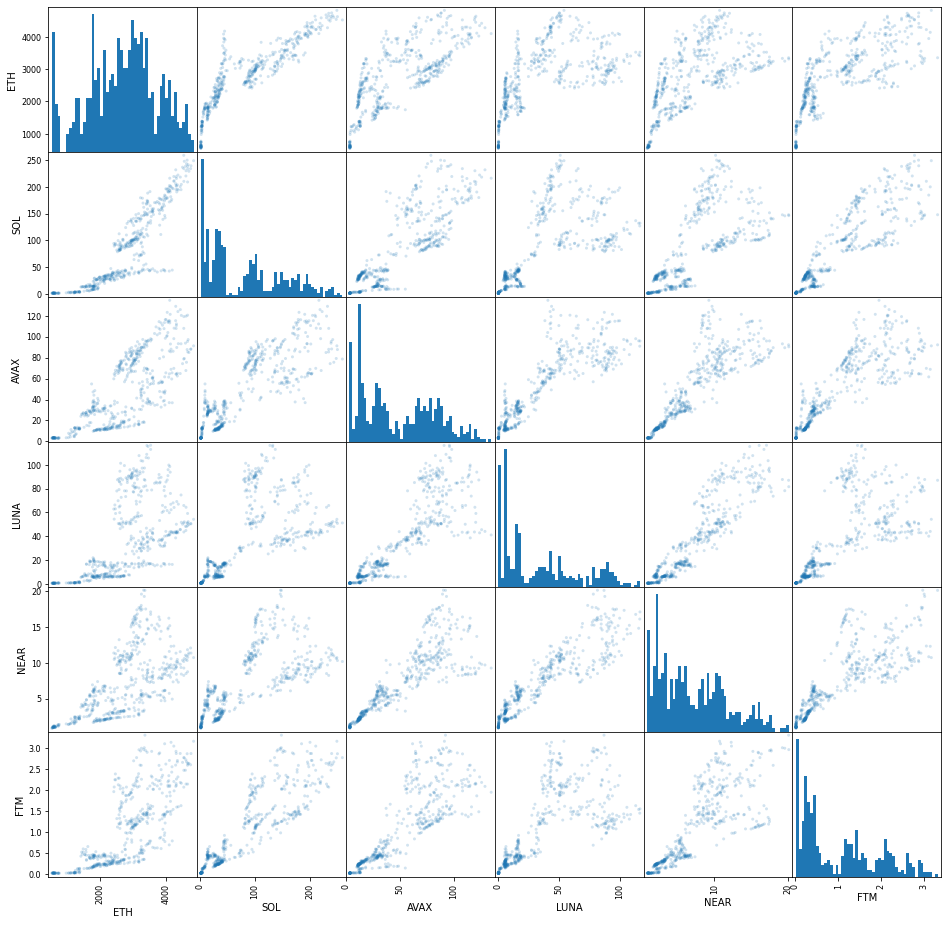

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(portfolio_df, figsize=(16,16),alpha=0.2,hist_kwds={'bins':50});

<AxesSubplot:xlabel='Date'>

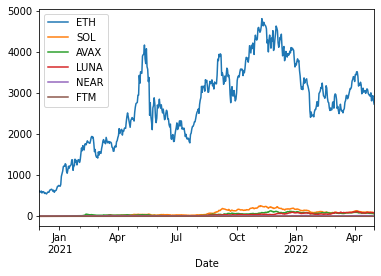

In [14]:
portfolio_df.plot()

In [15]:
portfolio_six_coins =['eth','sol','avax','luna','near','ftm']
portfolio_six_weights=[0.40,0.20,0.10,0.10,0.10,.10]
sum(portfolio_six_weights)

1.0

In [16]:
portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2020-12-01 to 2022-05-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ETH     517 non-null    float64
 1   SOL     517 non-null    float64
 2   AVAX    517 non-null    float64
 3   LUNA    517 non-null    float64
 4   NEAR    517 non-null    float64
 5   FTM     517 non-null    float64
dtypes: float64(6)
memory usage: 28.3 KB


Text(0.5, 1.0, 'Price Over Time')

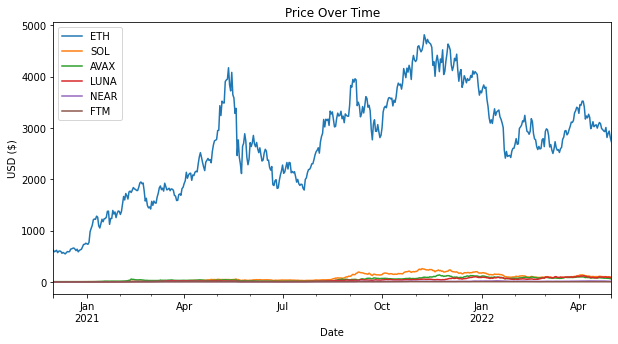

In [17]:
ax = portfolio_df.plot(figsize=(10,5))
ax.set_ylabel("USD ($)")
ax.set_xlabel("Date")
ax.set_title('Price Over Time')

In [18]:
def calculate_return(data):
    log_return = np.log(data/data.shift(1))
    return  log_return[1:]

In [19]:
vol_df = calculate_return(portfolio_df)
vol_df.head()

,ETH,SOL,AVAX,LUNA,NEAR,FTM
Date,,,,,,
2020-12-02,-0.048570,0.004690,-0.039578,-0.024717,-0.011853,-0.027058
2020-12-03,0.019514,0.070192,0.048636,0.045287,0.104684,0.101343
2020-12-04,0.029654,-0.007856,0.021563,0.220238,-0.019802,0.010547
2020-12-05,-0.080571,-0.125173,-0.077830,-0.115854,-0.046221,-0.089286
2020-12-06,0.048244,0.066320,0.029646,0.121027,0.008512,0.071169


In [20]:
GLOBAL_TRADING_DAYS = len(vol_df)
GLOBAL_TRADING_DAYS

516

In [21]:
vol_df.mean()

ETH     0.002888
SOL     0.007311
AVAX    0.005296
LUNA    0.010232
NEAR    0.004388
FTM     0.006749
dtype: float64

In [22]:
vol_df.cov()

,ETH,SOL,AVAX,LUNA,NEAR,FTM
ETH,0.002660,0.002281,0.002376,0.002525,0.002253,0.003057
SOL,0.002281,0.006115,0.003127,0.003650,0.002907,0.004246
AVAX,0.002376,0.003127,0.006855,0.003671,0.003302,0.003840
LUNA,0.002525,0.003650,0.003671,0.008564,0.003169,0.004216
NEAR,0.002253,0.002907,0.003302,0.003169,0.006619,0.004240
FTM,0.003057,0.004246,0.003840,0.004216,0.004240,0.010089


In [23]:
portfolio_df.pct_change(1).mean()

ETH     0.004216
SOL     0.010413
AVAX    0.008827
LUNA    0.014737
NEAR    0.007739
FTM     0.011942
dtype: float64

In [24]:
portfolio_df.pct_change(1).corr()

,ETH,SOL,AVAX,LUNA,NEAR,FTM
ETH,1.000000,0.536166,0.508402,0.491142,0.497286,0.555250
SOL,0.536166,1.000000,0.450834,0.463120,0.414831,0.506308
AVAX,0.508402,0.450834,1.000000,0.434560,0.445522,0.402186
LUNA,0.491142,0.463120,0.434560,1.000000,0.368607,0.413246
NEAR,0.497286,0.414831,0.445522,0.368607,1.000000,0.468477
FTM,0.555250,0.506308,0.402186,0.413246,0.468477,1.000000


In [25]:
portfolio_log_returns_df = np.log(portfolio_df/portfolio_df.shift(1))
portfolio_log_returns_df.head()

,ETH,SOL,AVAX,LUNA,NEAR,FTM
Date,,,,,,
2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-02,-0.048570,0.004690,-0.039578,-0.024717,-0.011853,-0.027058
2020-12-03,0.019514,0.070192,0.048636,0.045287,0.104684,0.101343
2020-12-04,0.029654,-0.007856,0.021563,0.220238,-0.019802,0.010547
2020-12-05,-0.080571,-0.125173,-0.077830,-0.115854,-0.046221,-0.089286


In [26]:
portfolio_log_returns_df.mean()

ETH     0.002888
SOL     0.007311
AVAX    0.005296
LUNA    0.010232
NEAR    0.004388
FTM     0.006749
dtype: float64

In [27]:
portfolio_log_returns_df.cov() * 365

,ETH,SOL,AVAX,LUNA,NEAR,FTM
ETH,0.970818,0.832618,0.867288,0.921711,0.822362,1.115644
SOL,0.832618,2.232056,1.141259,1.332113,1.060993,1.549713
AVAX,0.867288,1.141259,2.502127,1.339917,1.205294,1.401760
LUNA,0.921711,1.332113,1.339917,3.125732,1.156804,1.539001
NEAR,0.822362,1.060993,1.205294,1.156804,2.415944,1.547558
FTM,1.115644,1.549713,1.401760,1.539001,1.547558,3.682474


In [28]:
portfolio_six_weights = portfolio_six_weights/np.sum(portfolio_six_weights)
portfolio_six_weights, sum(portfolio_six_weights)

(array([0.4, 0.2, 0.1, 0.1, 0.1, 0.1]), 1.0)

In [29]:
expected_return = np.sum(portfolio_log_returns_df.mean() * portfolio_six_weights * 365)
expected_return

1.928709441492559

In [30]:
expected_volatility = np.sqrt(np.dot(portfolio_six_weights.T, np.dot(portfolio_log_returns_df.cov() * 365, portfolio_six_weights)))
expected_volatility

1.0772302044177444

In [31]:
sharpe_ratio = expected_return / expected_volatility
sharpe_ratio

1.790433867879753

In [32]:
TOTAL_RUNS = 100000
all_weights = np.zeros((TOTAL_RUNS,len(portfolio_six_weights)))
all_returns = np.zeros(TOTAL_RUNS)
all_vols = np.zeros(TOTAL_RUNS)
all_sharpes = np.zeros(TOTAL_RUNS)

for ind in range(TOTAL_RUNS):
    w = np.array(np.random.random(len(portfolio_six_weights)))
    w = w/np.sum(w)
    all_weights[ind,:] = w
    
    all_returns[ind] = np.sum(portfolio_log_returns_df.mean() * w * 365)
    
    all_vols[ind] = np.sqrt(np.dot(w.T, np.dot(portfolio_log_returns_df.cov() * 365, w)))
    
    all_sharpes[ind] = all_returns[ind] / all_vols[ind]

In [33]:
all_sharpes.max()

2.2626718661559915

In [34]:
all_sharpes.argmax()

46950

In [35]:
max_sr_ret = all_returns[int(all_sharpes.argmax())]
max_sr_vol = all_vols[int(all_sharpes.argmax())]

In [36]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(portfolio_log_returns_df.mean() * weights) * 365
    vol = np.sqrt(np.dot(weights.T, np.dot(portfolio_log_returns_df.cov() * 365, weights)))
    sr = ret / vol
    return np.array([ret,vol,sr])

def negative_sharpe(weights):
    return -1 * get_ret_vol_sr(weights)[2]

def check_sum(weights):
    return np.sum(weights) - 1

In [37]:
constraints = {
                    'type': 'eq',
                    'fun': check_sum             
                  }

In [38]:
bounds = tuple((0,1) for _ in range(len(portfolio_six_weights)))
bounds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [39]:
init_guess = portfolio_six_weights
init_guess

array([0.4, 0.2, 0.1, 0.1, 0.1, 0.1])

In [40]:
opt_results = minimize(fun=negative_sharpe,
                      x0=init_guess,
                      method='SLSQP',
                      bounds = bounds,
                      constraints= constraints
                      )
opt_results

     fun: -2.2716184324292237
     jac: array([ 0.23479557, -0.00077051,  0.03129113,  0.00052708,  0.11108741,
        0.00041029])
 message: 'Optimization terminated successfully'
    nfev: 42
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([5.50623862e-17, 4.05088351e-01, 3.56513518e-17, 5.82615018e-01,
       0.00000000e+00, 1.22966307e-02])

In [41]:
# efficient frontier - highest expected return, lowest risk possible for given expected return
frontier_y = np.linspace(2,5,100)

In [42]:
print(f"Optimum portfolio: {opt_results['x'].round(3)}")

Optimum portfolio: [0.    0.405 0.    0.583 0.    0.012]


In [43]:
def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]

In [44]:
frontier_vol = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun': check_sum}, 
            {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0] - possible_return})
    result = minimize(minimize_vol, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
    frontier_vol.append(result['fun'])

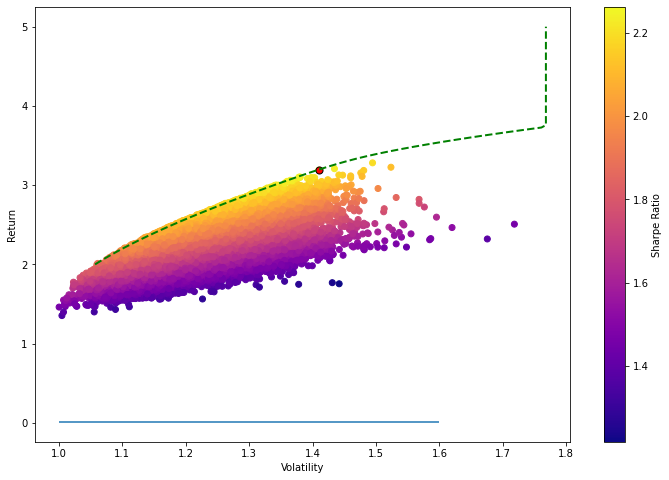

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(all_vols,all_returns,c=all_sharpes,cmap='plasma')
plt.hlines(y=0.01,xmin=1.0,xmax=1.6)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_vol, frontier_y,'g--',linewidth=2)
plt.scatter(max_sr_vol,max_sr_ret, c='red',s=50,edgecolors='black')